# Demo

In [1]:
import pydetach.recipe as rc

/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/scanpy/_utils/__init__.py:27: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/scanpy/__init__.py:36: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


# 1. Load and prep data

In [2]:
ref = rc.read_h5ad('h5ad/snRNA_mouse_demo.h5ad')
ref

AnnData object with n_obs × n_vars = 2000 × 769
    obs: 'cell_type'

In [3]:
rc.prepare_ref(ref)

Check ref.X types.
type(ref.X)=<class 'scipy.sparse._csr.csr_matrix'>. Pass.
ref.X.dtype=dtype('int64')
Check ref.obs[] cell_type column.
Reinit indices.


/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/pydetach/recipe.py:118: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  assert 'cell_type' in ref.obs_keys()


In [4]:
clf = rc.prepare_clf(ref)

In [5]:
trx = rc.read_h5ad('h5ad/spRNA_mouse_demo.h5ad')
trx

AnnData object with n_obs × n_vars = 6556 × 5227
    obs: 'x', 'y', 'old_index'
    obsm: 'spatial'

In [6]:
rc.prepare_trx(trx)

Check trx.X types.
type(trx.X)=<class 'scipy.sparse._csr.csr_matrix'>. Pass.
trx.X.dtype=dtype('int64')
Check trx.obsm[] spatial coordinates.
Preview: trx.obsm['spatial'][:5]=array([[0, 0],
       [0, 1],
       [0, 3],
       [0, 4],
       [0, 5]])
Reinit indices.


/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/pydetach/recipe.py:165: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  assert 'spatial' in trx.obsm_keys()


# 2. Process data

In [7]:
# If too sparse, use rc.prepare_bin() first.
rc.prepare_graph(trx)

Loading spatial coordinates from .obsm["spatial"]..
Building spatial distances, might take up large memory..


100%|██████████| 7/7 [00:00<00:00, 21.87it/s]


Saved in .obsp["spatial_distances"]. Related param saved in .uns["max_spatial_distance"]


In [8]:
rc.run_annotate(trx, clf)

Constructing spatial graph..
Trying to load from cache .obsp["spatial_distances"]..
Building local neighborhoods..
Building random-walk boundaries..


/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/pydetach/recipe.py:299: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  assert 'max_spatial_distance' in trx.uns_keys()


Aggregating spots within topology_nbhd_radius=1.5..
Building spot-wise profiles..
Getting defined embeddings..
Computing topology graph..
Skip the first round of classification for single spots.


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 24.65it/s]


Classifying..


Gather iter 1 results: 100%|██████████| 6556/6556 [00:00<00:00, 18913.92it/s]


Ave conf: 73.52%
counter_celltypes={'Other': 2831, 'PT': 380}
counter_celltypes_global={'Other': 2831, 'PT': 380}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]


Classifying..


Gather iter 2 results: 100%|██████████| 3345/3345 [00:00<00:00, 31805.00it/s]


Ave conf: 68.63%
counter_celltypes={'Other': 867, 'PT': 127}
counter_celltypes_global={'Other': 3698, 'PT': 507}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]


Classifying..


Gather iter 3 results: 100%|██████████| 2351/2351 [00:00<00:00, 36455.76it/s]


Ave conf: 67.02%
counter_celltypes={'PT': 84, 'Other': 488}
counter_celltypes_global={'Other': 4186, 'PT': 591}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]


Classifying..


Gather iter 4 results: 100%|██████████| 1779/1779 [00:00<00:00, 49484.16it/s]


Ave conf: 65.51%
counter_celltypes={'Other': 223, 'PT': 72}
counter_celltypes_global={'Other': 4409, 'PT': 663}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]


In [10]:
rc.run_segment(trx, n_workers=1)

Estimating chunk config..
Total 1 chunks.
Chunks ready. Allocating jobs..
Running jobs..


Loading spatial distances..


Finding cells: 100%|██████████| 6556/6556 [00:01<00:00, 3749.63it/s]


Gathering and sorting results..


Remapping cellmasks: 100%|████| 1/1 [00:00<00:00, 12.04it/s]

Done.



/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/pydetach/utils.py:66: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  while colname_to_save_oldIndex in adata.obs_keys():


# 3, (Optional) Get cell-level AnnData

In [11]:
cells = rc.get_cells(trx)
cells

Allocating 20 jobs..


Aggregating spots: 100%|██████████| 181/181 [00:00<00:00, 1364.92it/s]


Gathering results..
Done.


/home/liuxd/miniconda3/envs/pydetach104/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3393 × 5227
    obs: 'cell_id_detach', 'cell_type_detach'
    obsm: 'spatial'

# Illustration

In [12]:
trx.obs[['cell_type_detach', 'cell_size_detach', 'cell_id_detach']]

,cell_type_detach,cell_size_detach,cell_id_detach
0,Other,3,0
1,Other,3,0
2,Undefined,9,2
3,Other,2,75
4,PT,2,5
...,...,...,...
6551,Other,3,6552
6552,Other,3,6553
6553,Other,4,6553
6554,Other,2,6553


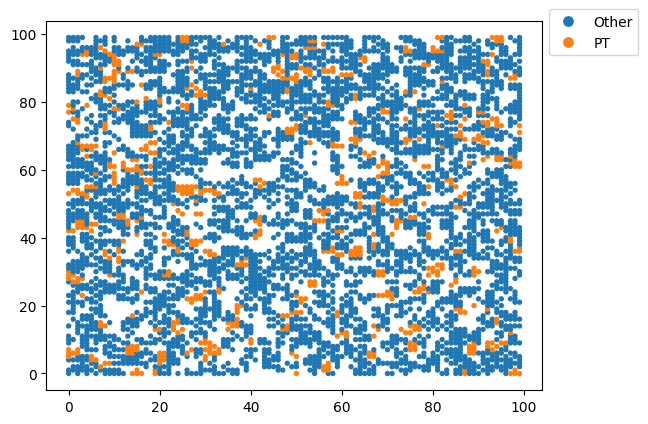

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
whr_def = trx.obs['cell_type_detach']!='Undefined'

sns.scatterplot(
    x=trx[whr_def].obsm['spatial'][:,0],
    y=trx[whr_def].obsm['spatial'][:,1],
    s=15,
    edgecolor='none',
    hue=trx.obs.loc[whr_def,'cell_type_detach'],
)
plt.legend(bbox_to_anchor=(1,1.05), loc='upper left', markerscale=2)
plt.show()